In [ ]:
# Package Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Read csv data file
# df = pd.read_csv('/content/drive/My Drive/soccer_dataset.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/soccer_dataset.csv')
df

Mounted at /content/drive


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Temp_Index_1,Temp_Index_2,Temp_Index_3,Temp_Index_4,Temp_Index_5,Time_Bins,Time_Bins_1,Time_Bins_2,Time_Bins_3,Time_Bins_4
0,3/8/14,12:00:00 PM,MLS,Regular Season,Sat,Home,W,1,0,Sportg KC,...,1,0,0,0,0,2,0,1,0,0
1,7/4/14,8:00:00 PM,MLS,Regular Season,Fri,Home,W,2,1,Philadelphia,...,0,0,0,0,5,2,0,1,0,0
2,3/23/14,2:00:00 PM,MLS,Regular Season,Sun,Home,D,1,1,NY Red Bulls,...,1,0,0,0,0,4,0,0,0,1
3,5/11/14,1:00:00 PM,MLS,Regular Season,Sun,Home,L,1,3,Chivas USA,...,0,1,0,0,0,4,0,0,0,1
4,3/22/14,7:30:00 PM,MLS,Regular Season,Sat,Home,W,1,0,San Jose,...,0,1,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,7/9/22,7:30:00 PM,MLS,Regular Season,Sat,Home,D,2,2,FC Dallas,...,0,0,0,0,5,3,0,0,1,0
2509,7/4/22,8:00:00 PM,MLS,Regular Season,Mon,Home,D,1,1,ter Miami,...,0,0,0,0,5,2,0,1,0,0
2510,7/16/22,8:00:00 PM,MLS,Regular Season,Sat,Home,D,1,1,Aust,...,0,0,0,0,5,3,0,0,1,0
2511,8/17/22,8:00:00 PM,MLS,Regular Season,Wed,Home,W,1,0,Philadelphia,...,0,0,0,0,5,2,0,1,0,0


In [ ]:
print(df.columns)

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Attendance', 'Year', 'Team', 'Temp', 'Precip.',
       'Condition', 'Num_allstar_home', 'num_allstar_away', 'Population',
       'City_market_size', 'home_elo', 'away_elo', 'Month', 'month_factor',
       'Distance', 'condition_value', 'Day_of_Week', 'Temp_Index',
       'Temp_Index_1', 'Temp_Index_2', 'Temp_Index_3', 'Temp_Index_4',
       'Temp_Index_5', 'Time_Bins', 'Time_Bins_1', 'Time_Bins_2',
       'Time_Bins_3', 'Time_Bins_4'],
      dtype='object')


In [ ]:
print(len(df.columns))

38


In [ ]:
# What is the type of each column
print(df.dtypes)

Date                 object
Time                 object
Comp                 object
Round                object
Day                  object
Venue                object
Result               object
GF                    int64
GA                    int64
Opponent             object
Attendance            int64
Year                  int64
Team                 object
Temp                 object
Precip.              object
Condition            object
Num_allstar_home      int64
num_allstar_away      int64
Population            int64
City_market_size    float64
home_elo            float64
away_elo            float64
Month                 int64
month_factor          int64
Distance            float64
condition_value       int64
Day_of_Week           int64
Temp_Index            int64
Temp_Index_1          int64
Temp_Index_2          int64
Temp_Index_3          int64
Temp_Index_4          int64
Temp_Index_5          int64
Time_Bins             int64
Time_Bins_1           int64
Time_Bins_2         

Pre-processing Data

In [ ]:
# Get the list of categorical columns (object, category, or string columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(len(categorical_columns))

# Get the list of numerical columns (int64, float64)
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(len(numerical_columns))

# Print the lists of categorical and numerical columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

12
26
Categorical Columns: ['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'Opponent', 'Team', 'Temp', 'Precip.', 'Condition']
Numerical Columns: ['GF', 'GA', 'Attendance', 'Year', 'Num_allstar_home', 'num_allstar_away', 'Population', 'City_market_size', 'home_elo', 'away_elo', 'Month', 'month_factor', 'Distance', 'condition_value', 'Day_of_Week', 'Temp_Index', 'Temp_Index_1', 'Temp_Index_2', 'Temp_Index_3', 'Temp_Index_4', 'Temp_Index_5', 'Time_Bins', 'Time_Bins_1', 'Time_Bins_2', 'Time_Bins_3', 'Time_Bins_4']


In [ ]:
df['Time_24'] = pd.to_datetime(df['Time']).dt.hour + pd.to_datetime(df['Time']).dt.minute / 60
df['Time_24']

<ipython-input-8-4ae3a3b0520e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_24'] = pd.to_datetime(df['Time']).dt.hour + pd.to_datetime(df['Time']).dt.minute / 60
<ipython-input-8-4ae3a3b0520e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_24'] = pd.to_datetime(df['Time']).dt.hour + pd.to_datetime(df['Time']).dt.minute / 60


,Time_24
0,12.0
1,20.0
2,14.0
3,13.0
4,19.5
...,...
2508,19.5
2509,20.0
2510,20.0
2511,20.0


<ipython-input-9-8622183556c5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


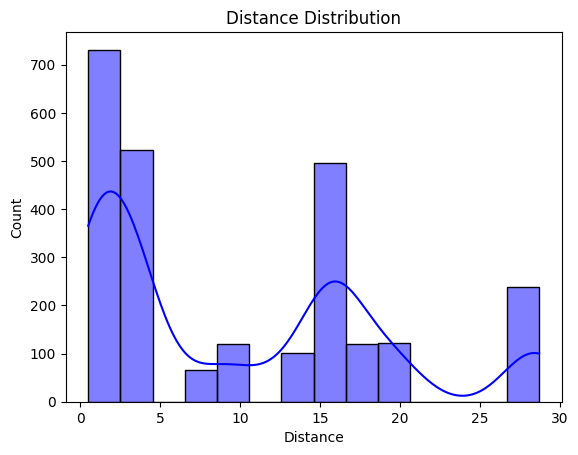

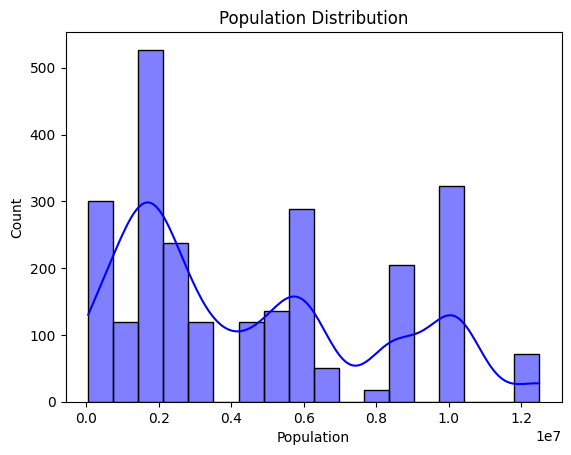

In [ ]:
# Create a new column, splitting the Date column into 2 categories:
  # Pre-COVID & Post-COVID
df['Date'] = pd.to_datetime(df['Date'])
df['Date_Categories'] = np.where(df['Date'] < '2019-11-01', 'Pre-COVID', 'Post-COVID')
df.drop('Date', axis=1) #should drop Date column as we have added Date_Categories

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the population feature
sns.histplot(df['Distance'], kde=True, color='blue')
plt.title('Distance Distribution')
plt.show()

print("\n")
# Plot the distribution of the population feature
sns.histplot(df['Population'], kde=True, color='blue')
plt.title('Population Distribution')
plt.show()

#Since distance and population is skewed, we are using log on it
df['log_distance'] = np.log1p(df['Distance'])
df['log_population'] = np.log1p(df['Population'])


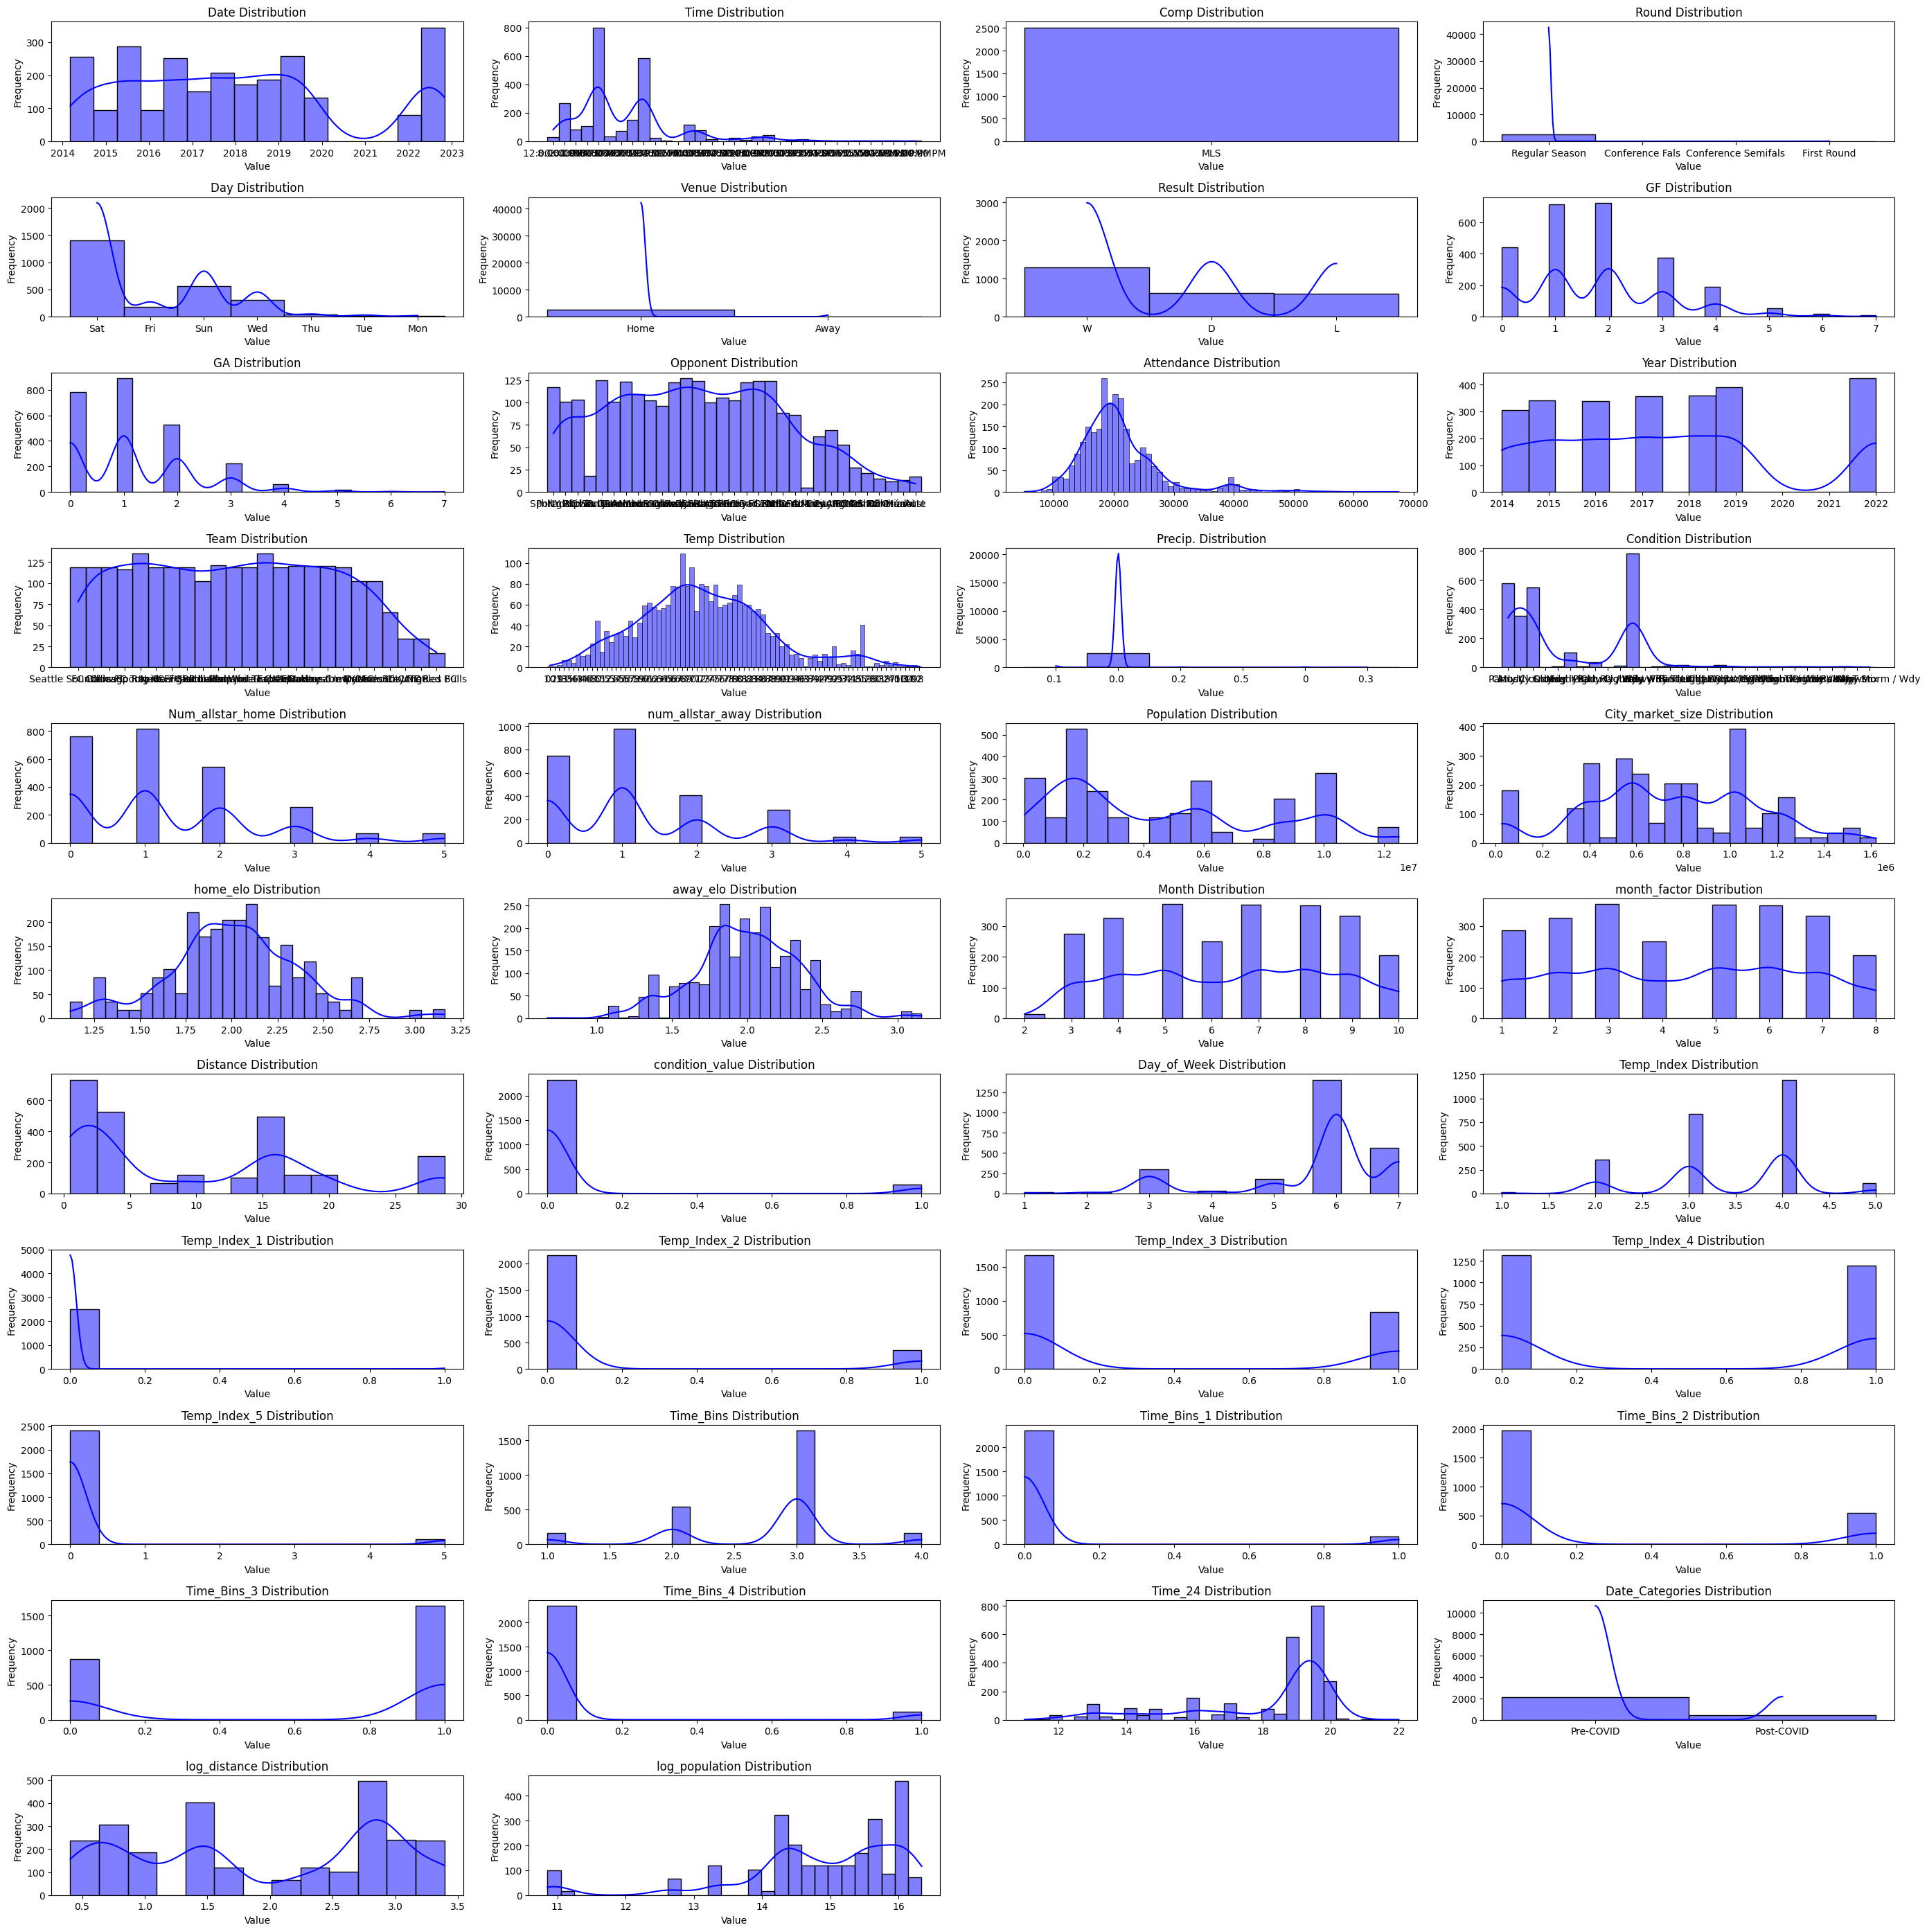

In [ ]:
# Plot distribution of all variables to understand if variable transformation is necessary
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4  # Calculate the number of rows needed

plt.figure(figsize=(28, 28))
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i) # Adjusted subplot layout
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Preprocessing
# Filter for regular season games
df = df[df['Round'] == 'Regular Season']
df = df.dropna()

# Encode binary variables
df['Result'] = df['Result'].map({'W': 2, 'D':1, 'L': 0})
df['Date_Categories'] = df['Date_Categories'].map({'Pre-COVID': 0, 'Post-COVID': 1})
df['Venue'] = df['Venue'].map({'Home': 1, 'Away': 0})

# Assign the target variable based on this threshold
df['Attendance_Binary'] = df['Attendance'].apply(lambda x: 1 if x > 21000 else 0) #1 is high, 0 is low
# Get the count of each class in the target variable
target_counts = df['Attendance_Binary'].value_counts()

# Print the class distribution
print("Class distribution in target variable:")
print(target_counts)

# Optionally, you can calculate the percentage of each class for better clarity
class_distribution_percentage = (df['Attendance_Binary'].value_counts(normalize=True) * 100)
print("\nClass distribution in percentage:")
print(class_distribution_percentage)

Class distribution in target variable:
Attendance_Binary
0    1557
1     951
Name: count, dtype: int64

Class distribution in percentage:
Attendance_Binary
0    62.08134
1    37.91866
Name: proportion, dtype: float64


Dependent and Independent Variables Defined

In [ ]:
X = df[['Venue', 'Result', 'GF', 'GA', 'Year', 'Temp', 'Precip.', 'Num_allstar_home', 'num_allstar_away', 'log_population',
       'City_market_size', 'home_elo', 'away_elo', 'Month',
       'log_distance', 'condition_value', 'Day_of_Week', 'Time_24', 'Date_Categories']] # Replace with your desired features (can remove Date as we have Date_Categories)
# 'Weather', 'GF', 'GA', 'Elo_Home', 'Elo_Away', 'All_Stars_Count'
y = df['Attendance_Binary']

Correlation Calculation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.concat([X, y], axis=1)
correlation_matrix = data.corr()
target_correlation = correlation_matrix[y.name]
target_correlation = target_correlation.drop(labels=y.name)
sorted_correlation = target_correlation.sort_values(ascending=False)

print("Feature Correlations with Target:")
print(sorted_correlation)

threshold = 0.02
selected_features = sorted_correlation[sorted_correlation.abs() > threshold].index.tolist()

print("\nSelected Features Based on Correlation Threshold:")
print(selected_features)

Feature Correlations with Target:
Num_allstar_home    0.217686
log_population      0.203397
home_elo            0.123851
City_market_size    0.116219
Day_of_Week         0.084250
GF                  0.071366
Month               0.064302
away_elo            0.054120
num_allstar_away    0.051821
GA                  0.051700
Venue               0.015625
Year                0.006939
Result              0.005384
Precip.             0.002191
Date_Categories    -0.006343
condition_value    -0.022742
Temp               -0.032023
Time_24            -0.113496
log_distance       -0.225216
Name: Attendance_Binary, dtype: float64

Selected Features Based on Correlation Threshold:
['Num_allstar_home', 'log_population', 'home_elo', 'City_market_size', 'Day_of_Week', 'GF', 'Month', 'away_elo', 'num_allstar_away', 'GA', 'condition_value', 'Temp', 'Time_24', 'log_distance']


Train-Test Split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train-Test Split(Using Selected Features from Correlation)

In [ ]:
X_selected = X[selected_features]

X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_trainf)
X_testf = scaler.transform(X_testf)

Logistic Regression(just preprocessing)

Class Distribution of LR (Percentage):
Low     68.326693
High    31.673307
Name: proportion, dtype: float64
0.651394422310757
Confusion Matrix of Logistic Regression (Benchmark):
[[233  65]
 [110  94]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.68      0.78      0.73       298
        High       0.59      0.46      0.52       204

    accuracy                           0.65       502
   macro avg       0.64      0.62      0.62       502
weighted avg       0.64      0.65      0.64       502



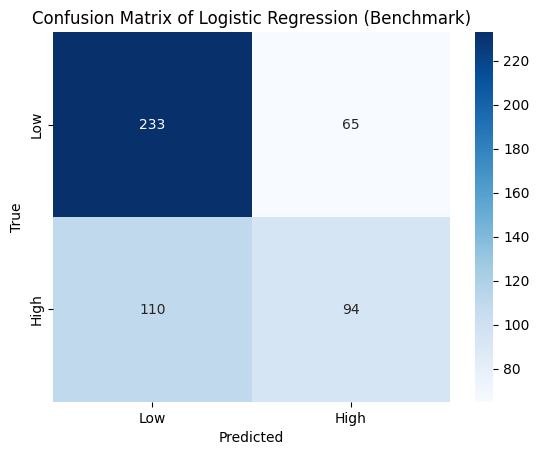

AUC: 0.7430


In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

class_distribution = pd.Series(y_pred).value_counts(normalize=True) * 100
print("Class Distribution of LR (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))

accuracy_score(y_test, y_pred)
print(log_reg.score(X_test, y_test))

print("Confusion Matrix of Logistic Regression (After Categorizing & Standardizing  Variables):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression (After Categorizing & Standardizing  Variables)')
plt.show()
y_prob = log_reg.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

Logistic Regression(L1)

Class Distribution of LR(L1) (Percentage):
Low     68.326693
High    31.673307
Name: proportion, dtype: float64
0.647410358565737
Confusion Matrix:
[[232  66]
 [111  93]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.68      0.78      0.72       298
        High       0.58      0.46      0.51       204

    accuracy                           0.65       502
   macro avg       0.63      0.62      0.62       502
weighted avg       0.64      0.65      0.64       502



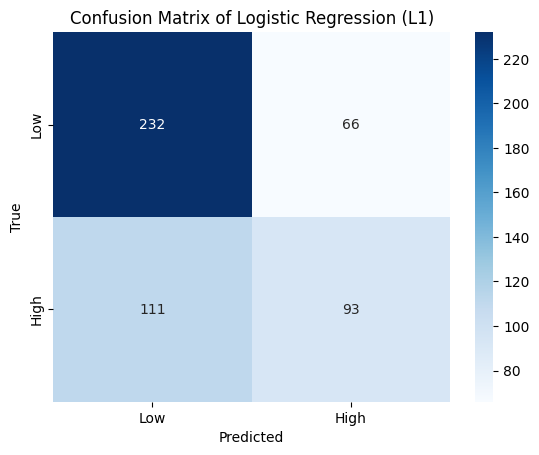

AUC: 0.7424


In [ ]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

class_distribution = pd.Series(y_pred).value_counts(normalize=True) * 100
print("Class Distribution of LR(L1) (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))

accuracy_score(y_test, y_pred)
print(log_reg.score(X_test, y_test))
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

# Optional: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression (L1)')
plt.show()
y_prob = log_reg.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

Logistic Regression(L1) Coefficients

In [ ]:
import pandas as pd

# Assuming your logistic regression model is trained (log_reg)
coefficients = log_reg.coef_[0]  # Coefficients for logistic regression
intercept = log_reg.intercept_[0]  # Intercept for logistic regression

# Create a DataFrame to show coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Adding intercept
coefficients_df = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]}),
    coefficients_df
], ignore_index=True)

# Sort by absolute coefficient values for better readability
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the table
print(coefficients_df.to_string(index=False))

         Feature  Coefficient  Absolute Coefficient
    log_distance    -0.908819              0.908819
  log_population     0.798267              0.798267
       Intercept    -0.693744              0.693744
Num_allstar_home     0.570630              0.570630
           Month     0.248064              0.248064
        home_elo     0.230002              0.230002
            Year     0.227968              0.227968
City_market_size    -0.220473              0.220473
     Day_of_Week     0.194614              0.194614
              GA     0.157798              0.157798
            Temp    -0.137509              0.137509
num_allstar_away     0.132600              0.132600
 Date_Categories    -0.093011              0.093011
        away_elo     0.083457              0.083457
         Time_24    -0.060824              0.060824
              GF     0.054534              0.054534
          Result     0.052623              0.052623
         Precip.     0.046337              0.046337
 condition_v

Logistic Regression(SMOTE)

Class Distribution of LR Resampled Data (Percentage):
Attendance_Binary
High    50.0
Low     50.0
Name: proportion, dtype: float64

Confusion Matrix (Resampled Data After SMOTE):
[[205 107]
 [ 75 236]]


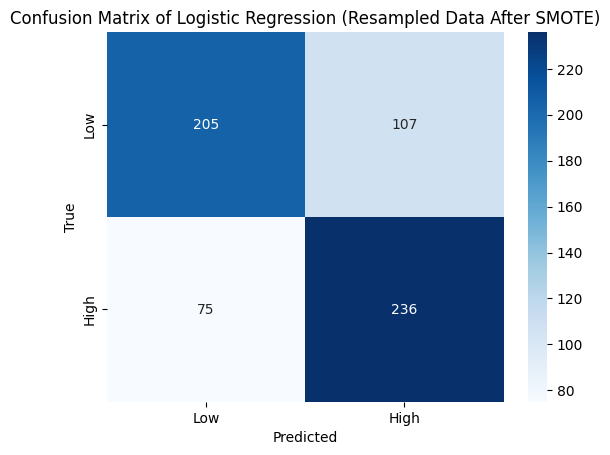


Classification Accuracy (Resampled Data): 0.7078651685393258

Classification Report (Resampled Data):
              precision    recall  f1-score   support

    Negative       0.73      0.66      0.69       312
    Positive       0.69      0.76      0.72       311

    accuracy                           0.71       623
   macro avg       0.71      0.71      0.71       623
weighted avg       0.71      0.71      0.71       623

AUC: 0.7778


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto' , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("Class Distribution of LR Resampled Data (Percentage):")
print(class_distribution_resampled.rename(index={0: 'Low', 1: 'High'}))

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

clf_resampled = LogisticRegression(max_iter=1000, random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = clf_resampled.predict(X_test_resampled)

conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
print("\nConfusion Matrix (Resampled Data After SMOTE):")
print(conf_matrix_resampled)
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression (Resampled Data After SMOTE)')
plt.show()

accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print("\nClassification Accuracy (Resampled Data):", accuracy_resampled)

class_report_resampled = classification_report(y_test_resampled, y_pred_resampled, target_names=['Negative', 'Positive'])
print("\nClassification Report (Resampled Data):")
print(class_report_resampled)

y_prob_resampled = clf_resampled.predict_proba(X_test_resampled)[:,1]
auc = roc_auc_score(y_test_resampled, y_prob_resampled)
print(f"AUC: {auc:.4f}")

Logistic Regression(SMOTE) Coefficients

In [ ]:
import pandas as pd

# Assuming your logistic regression model is trained (log_reg)
coefficients = clf_resampled.coef_[0]  # Coefficients for logistic regression
intercept = clf_resampled.intercept_[0]  # Intercept for logistic regression

# Create a DataFrame to show coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Adding intercept
coefficients_df = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]}),
    coefficients_df
], ignore_index=True)

# Sort by absolute coefficient values for better readability
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the table
print(coefficients_df.to_string(index=False))

         Feature  Coefficient  Absolute Coefficient
    log_distance    -0.931856              0.931856
  log_population     0.793587              0.793587
Num_allstar_home     0.583891              0.583891
          Result    -0.369727              0.369727
            Year     0.333101              0.333101
 Date_Categories    -0.243815              0.243815
City_market_size    -0.238483              0.238483
        home_elo     0.212722              0.212722
           Month     0.204051              0.204051
              GA    -0.192459              0.192459
 condition_value    -0.178445              0.178445
              GF     0.166757              0.166757
        away_elo     0.144092              0.144092
     Day_of_Week     0.134442              0.134442
            Temp    -0.096949              0.096949
         Time_24    -0.090894              0.090894
           Venue    -0.076236              0.076236
         Precip.     0.043043              0.043043
       Inter

Logistic Regression(L1 + SMOTE)

Class Distribution of LR Resampled Data & L1 (Percentage):
Attendance_Binary
High    50.0
Low     50.0
Name: proportion, dtype: float64

Confusion Matrix (Resampled Data After SMOTE):
[[205 107]
 [ 75 236]]


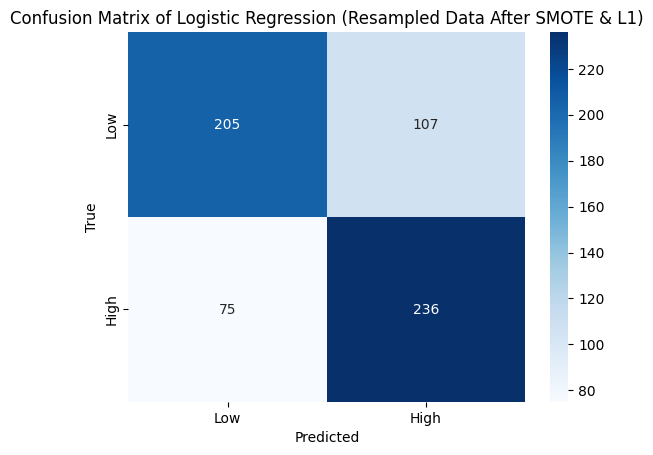


Classification Accuracy (Resampled Data): 0.7078651685393258

Classification Report (Resampled Data):
              precision    recall  f1-score   support

    Negative       0.73      0.66      0.69       312
    Positive       0.69      0.76      0.72       311

    accuracy                           0.71       623
   macro avg       0.71      0.71      0.71       623
weighted avg       0.71      0.71      0.71       623

AUC: 0.7775


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto' , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("Class Distribution of LR Resampled Data & L1 (Percentage):")
print(class_distribution_resampled.rename(index={0: 'Low', 1: 'High'}))

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

clf_resampled = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = clf_resampled.predict(X_test_resampled)

conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
print("\nConfusion Matrix (Resampled Data After SMOTE):")
print(conf_matrix_resampled)
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression (Resampled Data After SMOTE & L1)')
plt.show()

accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print("\nClassification Accuracy (Resampled Data):", accuracy_resampled)

class_report_resampled = classification_report(y_test_resampled, y_pred_resampled, target_names=['Negative', 'Positive'])
print("\nClassification Report (Resampled Data):")
print(class_report_resampled)

y_prob_resampled = clf_resampled.predict_proba(X_test_resampled)[:,1]
auc = roc_auc_score(y_test_resampled, y_prob_resampled)
print(f"AUC: {auc:.4f}")

Logistic Regression(L1 + SMOTE) Coefficients

In [ ]:
import pandas as pd

# Assuming your logistic regression model is trained (log_reg)
coefficients = clf_resampled.coef_[0]  # Coefficients for logistic regression
intercept = clf_resampled.intercept_[0]  # Intercept for logistic regression

# Create a DataFrame to show coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Adding intercept
coefficients_df = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]}),
    coefficients_df
], ignore_index=True)

# Sort by absolute coefficient values for better readability
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the table
print(coefficients_df.to_string(index=False))

         Feature  Coefficient  Absolute Coefficient
    log_distance    -0.929372              0.929372
  log_population     0.787909              0.787909
Num_allstar_home     0.582055              0.582055
          Result    -0.358449              0.358449
            Year     0.325695              0.325695
 Date_Categories    -0.235944              0.235944
City_market_size    -0.233404              0.233404
        home_elo     0.211911              0.211911
           Month     0.200613              0.200613
              GA    -0.183695              0.183695
 condition_value    -0.175357              0.175357
              GF     0.157834              0.157834
        away_elo     0.140013              0.140013
     Day_of_Week     0.132625              0.132625
            Temp    -0.093921              0.093921
         Time_24    -0.089961              0.089961
           Venue    -0.073621              0.073621
         Precip.     0.040575              0.040575
       Inter

Logistic Regression(Feature Selection using Correlation)

Class Distribution of Feature Selection (Percentage):
Low     70.717131
High    29.282869
Name: proportion, dtype: float64
0.647410358565737

Classification Report:
              precision    recall  f1-score   support

         Low       0.67      0.80      0.73       298
        High       0.59      0.43      0.50       204

    accuracy                           0.65       502
   macro avg       0.63      0.61      0.61       502
weighted avg       0.64      0.65      0.63       502



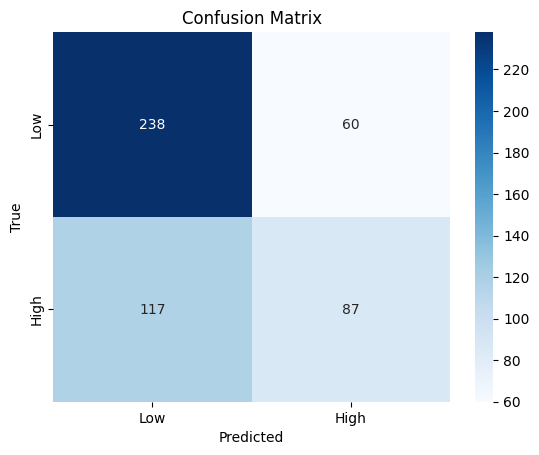

AUC: 0.7364


In [ ]:
modelF = LogisticRegression(max_iter=1000, random_state=42)
modelF.fit(X_trainf, y_trainf)

# Make predictions
y_predf = modelF.predict(X_testf)

# Evaluate the model
accuracy_scoref = accuracy_score(y_testf, y_predf)

class_distributionf = pd.Series(y_predf).value_counts(normalize=True) * 100
print("Class Distribution of Feature Selection (Percentage):")
print(class_distributionf.rename(index={0: 'Low', 1: 'High'}))

print(accuracy_scoref)
print("\nClassification Report:")
print(classification_report(y_testf, y_predf, target_names=['Low', 'High']))
sns.heatmap(confusion_matrix(y_testf, y_predf), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
y_probf = modelF.predict_proba(X_testf)[:,1]
auc = roc_auc_score(y_testf, y_probf)
print(f"AUC: {auc:.4f}")

Logistic Regression(Feature Selection using Correlation) Coefficients

In [ ]:
import pandas as pd

# Assuming your logistic regression model is trained (log_reg)
coefficients = modelF.coef_[0]  # Coefficients for logistic regression
intercept = modelF.intercept_[0]  # Intercept for logistic regression

# Create a DataFrame to show coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Coefficient': coefficients
})

# Adding intercept
coefficients_df = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]}),
    coefficients_df
], ignore_index=True)

# Sort by absolute coefficient values for better readability
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the table
print(coefficients_df.to_string(index=False))

         Feature  Coefficient  Absolute Coefficient
    log_distance    -0.890571              0.890571
  log_population     0.812821              0.812821
       Intercept    -0.691879              0.691879
Num_allstar_home     0.515406              0.515406
City_market_size    -0.238036              0.238036
           Month     0.234787              0.234787
        home_elo     0.233070              0.233070
     Day_of_Week     0.185918              0.185918
              GA     0.145683              0.145683
            Temp    -0.128332              0.128332
num_allstar_away     0.104715              0.104715
        away_elo     0.093913              0.093913
              GF     0.092110              0.092110
         Time_24    -0.069371              0.069371
 condition_value    -0.033139              0.033139


Random Forest


Random Forest(With just Pre-processing)

0.8764940239043825

Classification Accuracy: 0.8764940239043825
Class Distribution of RF(Percentage):
Low     65.338645
High    34.661355
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.95      0.90       298
    Positive       0.91      0.77      0.84       204

    accuracy                           0.88       502
   macro avg       0.88      0.86      0.87       502
weighted avg       0.88      0.88      0.87       502



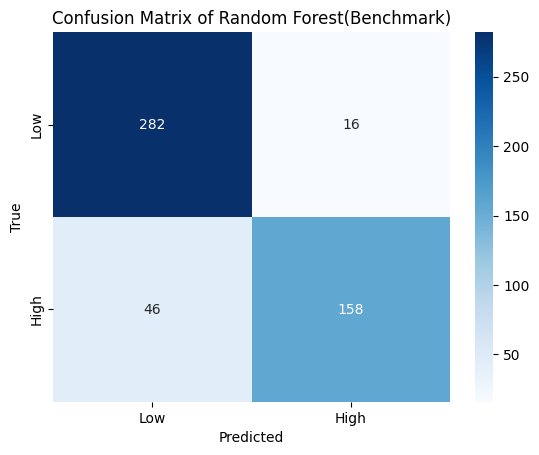

AUC: 0.9156


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=10, max_features=10)

classifier_RF.fit(X_train, y_train)
print(classifier_RF.score(X_test, y_test))

y_pred = classifier_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Accuracy:", accuracy)

class_distribution = pd.Series(y_pred).value_counts(normalize=True) * 100
print("Class Distribution of RF(Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))
class_report= classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest(After Categorizing & Standardizing  Variables)')
plt.show()
yprob = classifier_RF.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, yprob)
print(f"AUC: {auc:.4f}")

Random Forest(SMOTE)

Class Distribution of RF Resampled Data (Percentage):
Attendance_Binary
High    50.0
Low     50.0
Name: proportion, dtype: float64

Confusion Matrix (Resampled Data):
[[288  24]
 [ 37 274]]

Classification Accuracy (Resampled Data): 0.9020866773675762

Classification Report (Resampled Data):
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.90       312
    Positive       0.92      0.88      0.90       311

    accuracy                           0.90       623
   macro avg       0.90      0.90      0.90       623
weighted avg       0.90      0.90      0.90       623



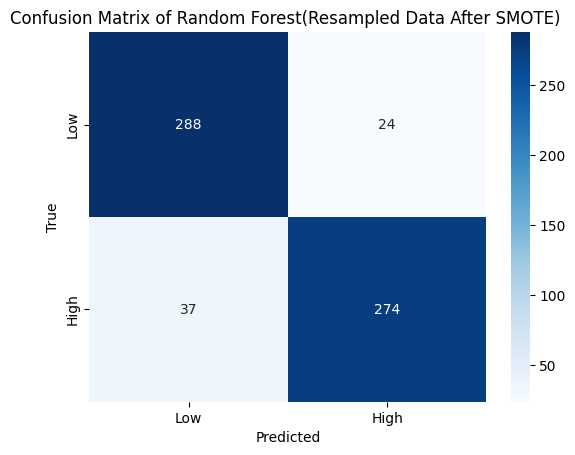

AUC: 0.9612


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto' , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("Class Distribution of RF Resampled Data (Percentage):")
print(class_distribution_resampled.rename(index={0: 'Low', 1: 'High'}))

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=9, stratify=y_resampled)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

clf_resampled = RandomForestClassifier(n_estimators=10, max_features=10)
clf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = clf_resampled.predict(X_test_resampled)
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
print("\nConfusion Matrix (Resampled Data):")
print(conf_matrix_resampled)

accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print("\nClassification Accuracy (Resampled Data):", accuracy_resampled)

class_report_resampled = classification_report(y_test_resampled, y_pred_resampled, target_names=['Negative', 'Positive'])
print("\nClassification Report (Resampled Data):")
print(class_report_resampled)
sns.heatmap(confusion_matrix(y_test_resampled, y_pred_resampled), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest(Resampled Data After SMOTE) ')
plt.show()

y_prob = clf_resampled.predict_proba(X_test_resampled)[:,1]
auc = roc_auc_score(y_test_resampled, y_prob)
print(f"AUC: {auc:.4f}")

Random Forest(SMOTE) Coefficients

In [ ]:
import pandas as pd

# Get feature importances from the trained Random Forest model
importances = clf_resampled.feature_importances_

# Create a DataFrame to show feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,  # Use the original feature names from X
    'Importance': importances
})

# Sort by importance values for better readability
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importances_df.to_string(index=False))

         Feature  Importance
    log_distance    0.253097
City_market_size    0.146467
  log_population    0.118059
        home_elo    0.075003
Num_allstar_home    0.069891
            Temp    0.065742
        away_elo    0.060835
           Month    0.035685
            Year    0.031425
     Day_of_Week    0.027026
         Time_24    0.026578
              GA    0.025504
              GF    0.020781
num_allstar_away    0.020041
          Result    0.012673
 condition_value    0.005187
 Date_Categories    0.003236
           Venue    0.002514
         Precip.    0.000256


Random Forest(Feature Selection Correlation)

Class Distribution of RF Feature Selection (Percentage):
Low     64.342629
High    35.657371
Name: proportion, dtype: float64
0.8745019920318725

Classification Report:
              precision    recall  f1-score   support

         Low       0.86      0.94      0.90       298
        High       0.89      0.78      0.84       204

    accuracy                           0.87       502
   macro avg       0.88      0.86      0.87       502
weighted avg       0.88      0.87      0.87       502



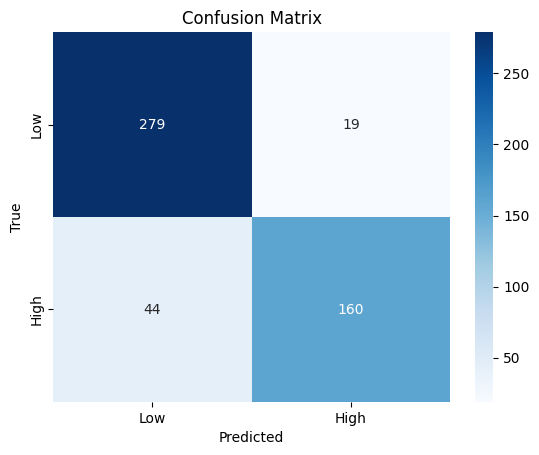

AUC: 0.8997


In [ ]:
classifier_RF = RandomForestClassifier(n_estimators=10, max_features=len(selected_features), random_state=42)
classifier_RF.fit(X_trainf, y_trainf)

y_predf = classifier_RF.predict(X_testf)

new_accuracy = accuracy_score(y_testf, y_predf)

class_distribution = pd.Series(y_predf).value_counts(normalize=True) * 100

print("Class Distribution of RF Feature Selection (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))

print(new_accuracy)
print("\nClassification Report:")
print(classification_report(y_testf, y_predf, target_names=['Low', 'High']))
sns.heatmap(confusion_matrix(y_testf, y_predf), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
y_probf = classifier_RF.predict_proba(X_testf)[:,1]
auc = roc_auc_score(y_testf, y_probf)
print(f"AUC: {auc:.4f}")

Random Forest(Tuning)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
rf_tuned = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    n_estimators=50,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
yprob1 = rf_tuned.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, yprob1)
class_distribution = pd.Series(y_pred).value_counts(normalize=True) * 100
print("Class Distribution of RF Tuned (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC: {auc:.4f}")

XG Boost(With just Pre-processing)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:18:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.8645418326693227

Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.93      0.89       298
        High       0.88      0.77      0.82       204

    accuracy                           0.86       502
   macro avg       0.87      0.85      0.86       502
weighted avg       0.87      0.86      0.86       502

Class Distribution of XGBOOST (Percentage):
Low     64.541833
High    35.458167
Name: proportion, dtype: float64
AUC: 0.9190


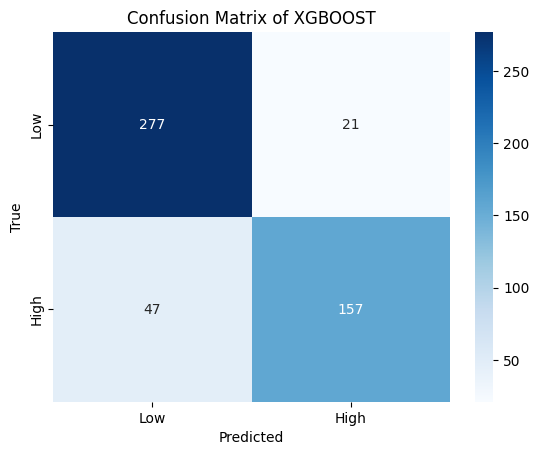

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(xgb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred, target_names=['Low', 'High']))
class_distribution = pd.Series(xgb_y_pred).value_counts(normalize=True) * 100
print("Class Distribution of XGBOOST (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))
y_prob = xgb_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBOOST(After Categorizing & Standardizing  Variables)')
plt.show()

XGBoost(Different Baseline, With just Pre-processing)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.6354581673306773

Classification Report:
              precision    recall  f1-score   support

         Low       0.67      0.77      0.71       298
        High       0.57      0.45      0.50       204

    accuracy                           0.64       502
   macro avg       0.62      0.61      0.61       502
weighted avg       0.63      0.64      0.63       502

AUC: 0.7421


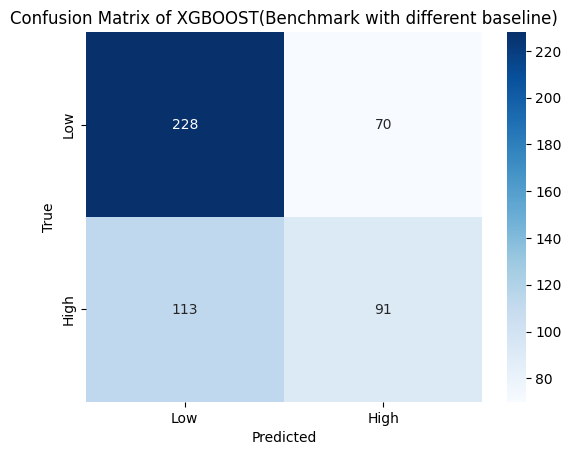

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(booster='gblinear', objective='binary:logistic', learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(xgb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred, target_names=['Low', 'High']))

y_prob = xgb_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBOOST(After Categorizing & Standardizing  Variables with different baseline)')
plt.show()

XGBoost(Feature Selection Correlation)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.8605577689243028

Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.93      0.89       298
        High       0.88      0.76      0.82       204

    accuracy                           0.86       502
   macro avg       0.86      0.85      0.85       502
weighted avg       0.86      0.86      0.86       502

Class Distribution of XGBOOST Feature Selection (Percentage):
Low     64.541833
High    35.458167
Name: proportion, dtype: float64


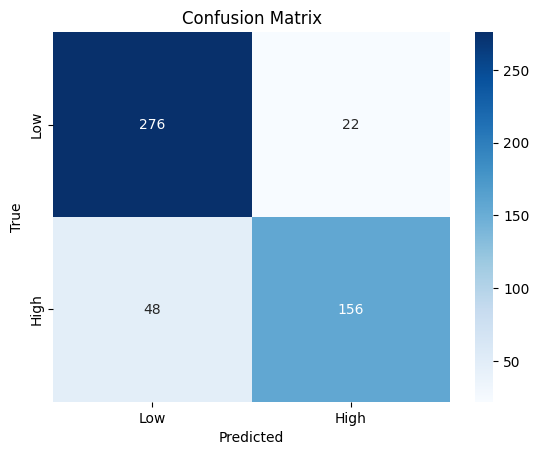

AUC: 0.9167


In [ ]:
xgb_model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model2.fit(X_trainf, y_trainf)

# Make predictions
xgb_y_pred2 = xgb_model2.predict(X_testf)

# Evaluate the model
xgb_accuracy2 = accuracy_score(y_testf, xgb_y_pred2)
print(xgb_accuracy2)
print("\nClassification Report:")
print(classification_report(y_testf, xgb_y_pred2, target_names=['Low', 'High']))
class_distribution = pd.Series(xgb_y_pred2).value_counts(normalize=True) * 100
print("Class Distribution of XGBOOST Feature Selection (Percentage):")
print(class_distribution.rename(index={0: 'Low', 1: 'High'}))
sns.heatmap(confusion_matrix(y_testf, xgb_y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
y_probx = xgb_model2.predict_proba(X_testf)[:,1]
auc = roc_auc_score(y_testf, y_probx)
print(f"AUC: {auc:.4f}")

XGBoost(Different Baseline, Feature Selection Correlation)

0.6454183266932271

Classification Report:
              precision    recall  f1-score   support

         Low       0.67      0.80      0.73       298
        High       0.59      0.42      0.49       204

    accuracy                           0.65       502
   macro avg       0.63      0.61      0.61       502
weighted avg       0.64      0.65      0.63       502



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


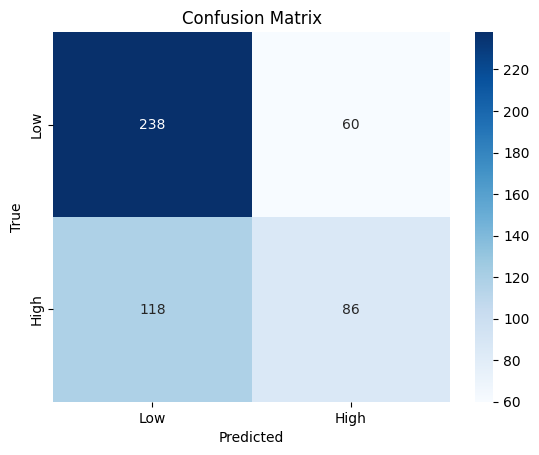

AUC: 0.7357


In [ ]:
xgb_model2 = XGBClassifier(booster='gblinear', objective='binary:logistic', learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model2.fit(X_trainf, y_trainf)

# Make predictions
xgb_y_pred2 = xgb_model2.predict(X_testf)

# Evaluate the model
xgb_accuracy2 = accuracy_score(y_testf, xgb_y_pred2)
print(xgb_accuracy2)
print("\nClassification Report:")
print(classification_report(y_testf, xgb_y_pred2, target_names=['Low', 'High']))
sns.heatmap(confusion_matrix(y_testf, xgb_y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
y_probx = xgb_model2.predict_proba(X_testf)[:,1]
auc = roc_auc_score(y_testf, y_probx)
print(f"AUC: {auc:.4f}")

XGBoost(SMOTE)

Class Distribution of XGBoost Resampled Data (Percentage):
Attendance_Binary
High    50.0
Low     50.0
Name: proportion, dtype: float64

Confusion Matrix (Resampled Data After SMOTE):
[[284  28]
 [ 31 280]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


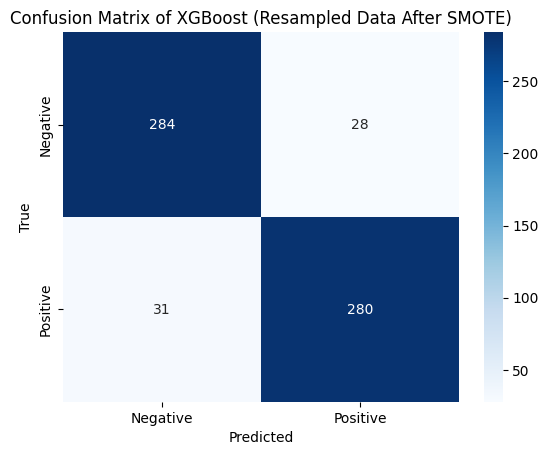


Classification Accuracy (Resampled Data): 0.9052969502407705

Classification Report (Resampled Data):
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.91       312
    Positive       0.91      0.90      0.90       311

    accuracy                           0.91       623
   macro avg       0.91      0.91      0.91       623
weighted avg       0.91      0.91      0.91       623

AUC: 0.9702


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("Class Distribution of XGBoost Resampled Data (Percentage):")
print(class_distribution_resampled.rename(index={0: 'Low', 1: 'High'}))
X_resampled['Temp'] = pd.to_numeric(X_resampled['Temp'], errors='coerce')
X_resampled['Precip.'] = pd.to_numeric(X_resampled['Precip.'], errors='coerce')

###
# Now proceed with the model training
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=9, stratify=y_resampled
)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

xg_resampled = XGBClassifier(max_iter=1000, random_state=42)
xg_resampled.fit(X_train_resampled, y_train_resampled)


y_xgpred_resampled = xg_resampled.predict(X_test_resampled)

conf_matrix_resampled = confusion_matrix(y_test_resampled, y_xgpred_resampled)
print("\nConfusion Matrix (Resampled Data After SMOTE):")
print(conf_matrix_resampled)
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost (Resampled Data After SMOTE)')
plt.show()

accuracy_resampled = accuracy_score(y_test_resampled, y_xgpred_resampled)
print("\nClassification Accuracy (Resampled Data):", accuracy_resampled)

class_report_resampled = classification_report(y_test_resampled, y_xgpred_resampled, target_names=['Negative', 'Positive'])
print("\nClassification Report (Resampled Data):")
print(class_report_resampled)

y_prob_resampled = xg_resampled.predict_proba(X_test_resampled)[:,1]
auc = roc_auc_score(y_test_resampled, y_prob_resampled)
print(f"AUC: {auc:.4f}")

XGBoost(SMOTE) Coefficients

In [ ]:
import pandas as pd

# Get feature importances from the trained XGBoost model
importances = xg_resampled.feature_importances_

# Create a DataFrame to show feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,  # Use the original feature names from X
    'Importance': importances
})

# Sort by importance values for better readability
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importances_df.to_string(index=False))

         Feature  Importance
    log_distance    0.210591
  log_population    0.128032
Num_allstar_home    0.117881
        home_elo    0.064262
 condition_value    0.061774
City_market_size    0.061564
            Year    0.060875
     Day_of_Week    0.049377
           Venue    0.043929
           Month    0.031548
            Temp    0.028182
        away_elo    0.025629
          Result    0.024676
              GA    0.023674
num_allstar_away    0.023419
              GF    0.022922
         Time_24    0.021666
         Precip.    0.000000
 Date_Categories    0.000000


XGBoost(Different Baseline, SMOTE)

Class Distribution of Resampled Data (Percentage):
Attendance_Binary
Positive    50.0
Negative    50.0
Name: proportion, dtype: float64

Confusion Matrix (Resampled Data):
[[183 129]
 [ 92 219]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


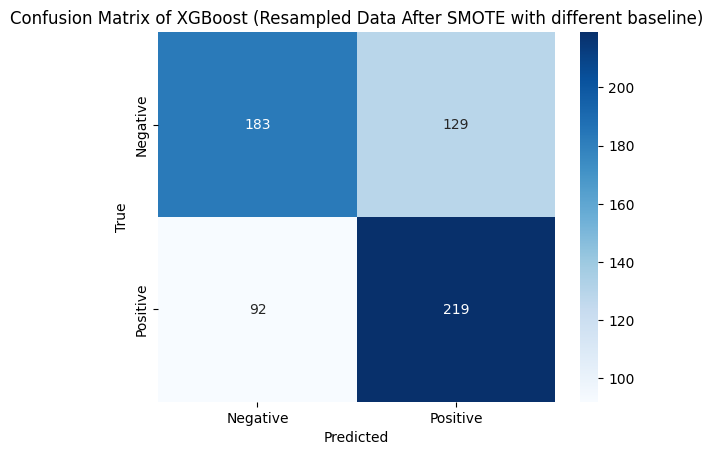


Classification Accuracy (Resampled Data): 0.6452648475120385

Classification Report (Resampled Data):
              precision    recall  f1-score   support

    Negative       0.67      0.59      0.62       312
    Positive       0.63      0.70      0.66       311

    accuracy                           0.65       623
   macro avg       0.65      0.65      0.64       623
weighted avg       0.65      0.65      0.64       623

AUC: 0.7224


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("Class Distribution of Resampled Data (Percentage):")
print(class_distribution_resampled.rename(index={0: 'Negative', 1: 'Positive'}))
X_resampled['Temp'] = pd.to_numeric(X_resampled['Temp'], errors='coerce')
X_resampled['Precip.'] = pd.to_numeric(X_resampled['Precip.'], errors='coerce')

###
# Now proceed with the model training
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=9, stratify=y_resampled
)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

xg_resampled = XGBClassifier(booster='gblinear', objective='binary:logistic', learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xg_resampled.fit(X_train_resampled, y_train_resampled)


y_xgpred_resampled = xg_resampled.predict(X_test_resampled)

conf_matrix_resampled = confusion_matrix(y_test_resampled, y_xgpred_resampled)
print("\nConfusion Matrix (Resampled Data):")
print(conf_matrix_resampled)
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost (Resampled Data After SMOTE with different baseline)')
plt.show()

accuracy_resampled = accuracy_score(y_test_resampled, y_xgpred_resampled)
print("\nClassification Accuracy (Resampled Data):", accuracy_resampled)

class_report_resampled = classification_report(y_test_resampled, y_xgpred_resampled, target_names=['Negative', 'Positive'])
print("\nClassification Report (Resampled Data):")
print(class_report_resampled)

y_prob_resampled = xg_resampled.predict_proba(X_test_resampled)[:,1]
auc = roc_auc_score(y_test_resampled, y_prob_resampled)
print(f"AUC: {auc:.4f}")

Logistic Regression, Random Forest, XGBoost(No Pre-processing)

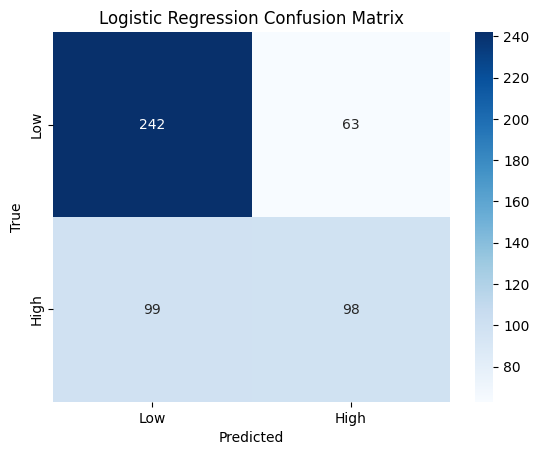


)


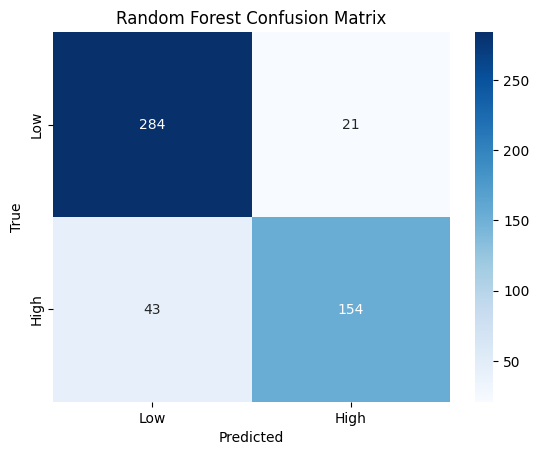


)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


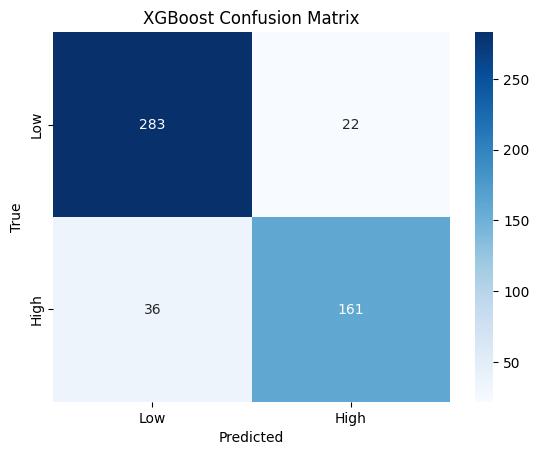


)
Logistic Regression Report
              precision    recall  f1-score   support

         Low       0.71      0.79      0.75       305
        High       0.61      0.50      0.55       197

    accuracy                           0.68       502
   macro avg       0.66      0.65      0.65       502
weighted avg       0.67      0.68      0.67       502

AUCLR: 0.7439
Random Forest Report
              precision    recall  f1-score   support

         Low       0.87      0.93      0.90       305
        High       0.88      0.78      0.83       197

    accuracy                           0.87       502
   macro avg       0.87      0.86      0.86       502
weighted avg       0.87      0.87      0.87       502

AUCRF: 0.9271
XGBoost Report
              precision    recall  f1-score   support

         Low       0.89      0.93      0.91       305
        High       0.88      0.82      0.85       197

    accuracy                           0.88       502
   macro avg       0.88      0.87 

In [ ]:
X_pp = df[['GF', 'GA', 'Year', 'Temp', 'Precip.', 'Num_allstar_home', 'num_allstar_away', 'Population',
       'City_market_size', 'home_elo', 'away_elo', 'Month', 'month_factor',
       'Distance', 'condition_value', 'Day_of_Week', 'Temp_Index',
       'Temp_Index_1', 'Temp_Index_2', 'Temp_Index_3', 'Temp_Index_4',
       'Temp_Index_5', 'Time_Bins', 'Time_Bins_1', 'Time_Bins_2',
       'Time_Bins_3', 'Time_Bins_4']]
y = df['Attendance_Binary']

# Split the data
X_trainpp, X_testpp, y_train, y_test = train_test_split(X_pp, y, test_size=0.2, random_state=9)

# Standardize the features
scaler = StandardScaler()
X_trainpp = scaler.fit_transform(X_trainpp)
X_testpp = scaler.transform(X_testpp)

# Initialize a function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Logistic Regression
log = LogisticRegression(max_iter=1000, random_state=42)
log.fit(X_trainpp, y_train)
logy_pred = log.predict(X_testpp)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, logy_pred, "Logistic Regression Confusion Matrix")
print("\n)")
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_trainpp, y_train)
rfy_pred = rf.predict(X_testpp)

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rfy_pred, "Random Forest Confusion Matrix")
print("\n)")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_trainpp, y_train)
xgby_pred = xgb.predict(X_testpp)

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgby_pred, "XGBoost Confusion Matrix")
print("\n)")

# Optional: Print classification reports
print("Logistic Regression Report")
print(classification_report(y_test, logy_pred, target_names=['Low', 'High']))
y_probLR = log.predict_proba(X_testpp)[:,1]
auc = roc_auc_score(y_test, y_probLR)
print(f"AUCLR: {auc:.4f}")

print("Random Forest Report")
print(classification_report(y_test, rfy_pred, target_names=['Low', 'High']))
y_probRF = rf.predict_proba(X_testpp)[:,1]
auc = roc_auc_score(y_test, y_probRF)
print(f"AUCRF: {auc:.4f}")

print("XGBoost Report")
print(classification_report(y_test, xgby_pred, target_names=['Low', 'High']))
y_probXG = xgb.predict_proba(X_testpp)[:,1]
auc = roc_auc_score(y_test, y_probXG)
print(f"AUCXG: {auc:.4f}")

Data Visualization

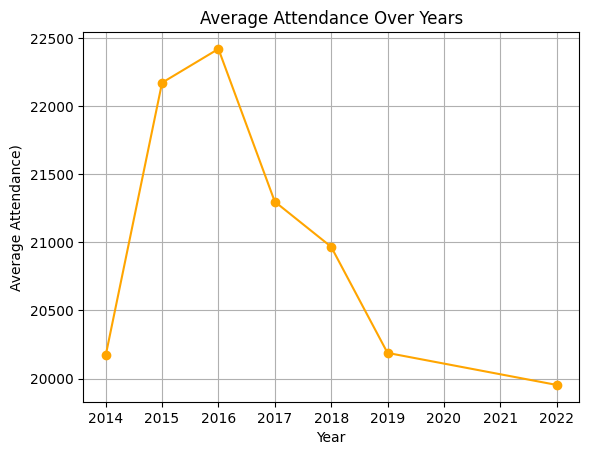

In [ ]:
# Average Attendance Over the Years

avg_Attendance_yearly = df.groupby('Year')['Attendance'].mean()
avg_Attendance_yearly.plot(kind='line', marker='o', color='orange')
plt.title('Average Attendance Over Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance)')
plt.grid(True)
plt.show()

                  count         mean          std     min      25%      50%  \
Date_Categories                                                               
0                2089.0  21194.04404  7321.923358  5128.0  17025.0  19844.0   
1                 419.0  19953.76611  5917.249333  8113.0  15930.5  19439.0   

                     75%      max  
Date_Categories                    
0                23372.0  64358.0  
1                22471.0  67523.0  


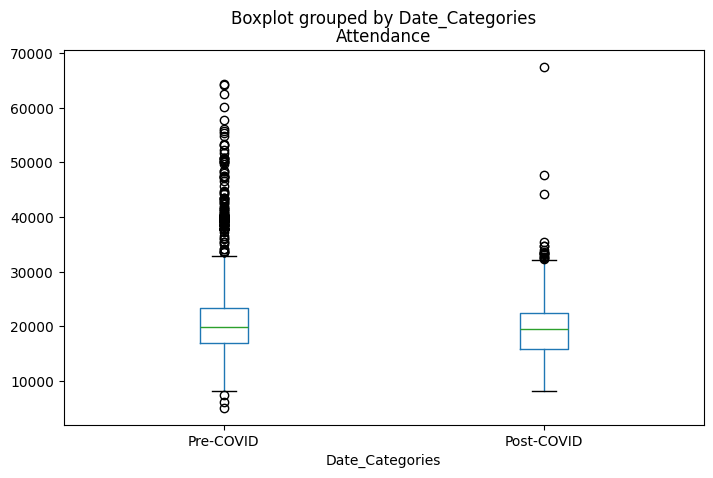

In [ ]:
#Pre/ Post COVID Comparison of Attendance
print(df.groupby('Date_Categories')['Attendance'].describe())
df.boxplot(column='Attendance', by='Date_Categories', grid=False, figsize = (8,5))
#Relabel 0 and 1 to Pre/ Post COVID
plt.xticks([1,2], ['Pre-COVID', 'Post-COVID'])
plt.show()

        count          mean           std     min       25%      50%  \
Venue                                                                  
0        32.0  20735.625000  10083.927153  9352.0  15101.25  19171.0   
1      2476.0  20990.083199   7076.985073  5128.0  16826.25  19778.5   

            75%      max  
Venue                     
0      22212.00  67523.0  
1      23139.25  64358.0  


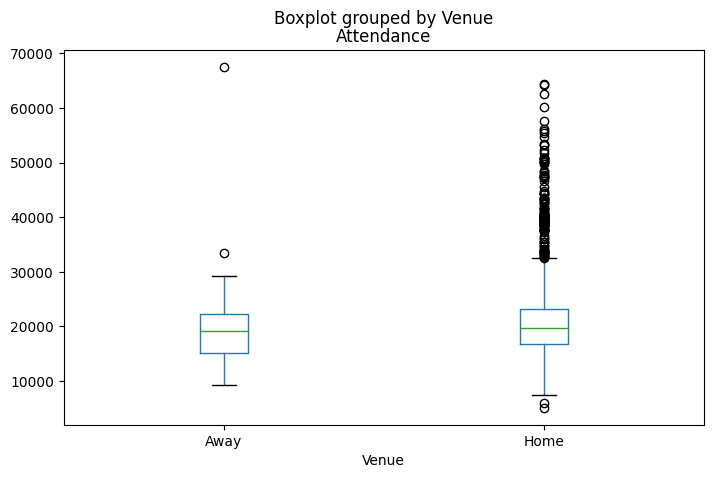

In [ ]:
print(df.groupby('Venue')['Attendance'].describe())
df.boxplot(column='Attendance', by='Venue', grid=False, figsize = (8,5))
#Relabel 0 and 1 to Away/ Home
plt.xticks([1,2], ['Away', 'Home'])
plt.show()

<ipython-input-145-01b663b55b3c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Team', y='Attendance', data=df, estimator='mean', ci=None)


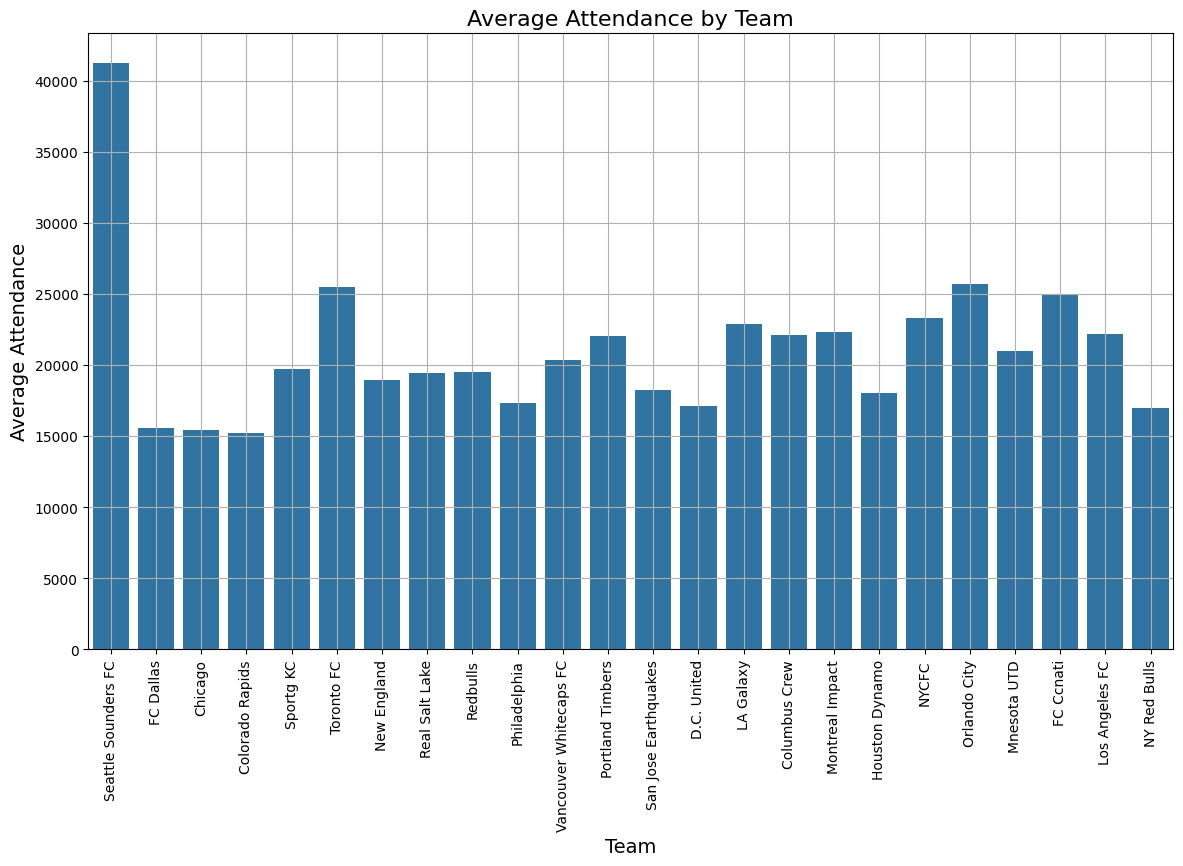

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Attendance', data=df, estimator='mean', ci=None)
plt.title('Average Attendance by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Average Attendance', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

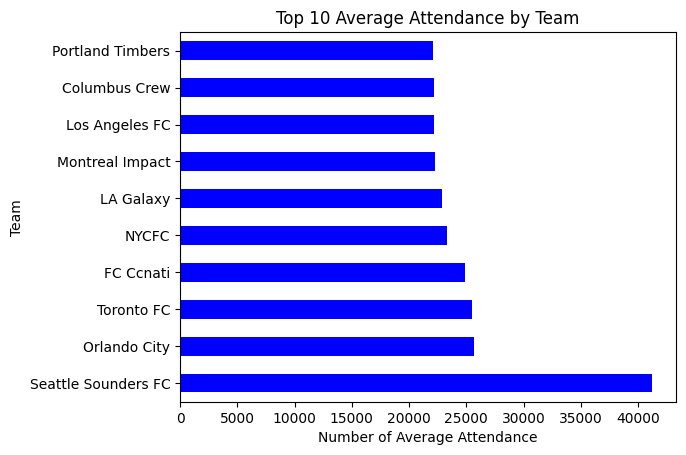

In [ ]:
# Top 10 Average Attendance by Team
attendance_by_team_count = (
     df.groupby('Team')['Attendance']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

attendance_by_team_count.plot(kind='barh', color='blue')
plt.title('Top 10 Average Attendance by Team')
plt.ylabel('Team')
plt.xlabel('Number of Average Attendance')
plt.xticks(ha='center')
plt.show()

In [ ]:
# Group the original DataFrame (df) by both 'Team' and 'Date_Categories'

df['Date_Categories_'] = df['Date_Categories'].apply(lambda x: 'Pre-COVID' if x == 0 else 'Post-COVID')
df.loc[df['Team'] == 'Redbulls', 'Team'] = 'NY Red Bulls'
attendance_by_team_date = df.groupby(['Team', 'Date_Categories_'])['Attendance'].mean().reset_index()
covidteam = attendance_by_team_date.sort_values(by='Attendance', ascending=False)
pivot_df = covidteam.pivot(index='Team', columns='Date_Categories_', values='Attendance')
pivot_df

Date_Categories_,Post-COVID,Pre-COVID
Team,,
Chicago,15847.647059,15365.735294
Colorado Rapids,14303.500000,15330.530000
Columbus Crew,22841.235294,22017.019608
D.C. United,16256.176471,17273.058824
FC Ccnati,22486.705882,27336.470588
FC Dallas,16468.529412,15399.990196
Houston Dynamo,16425.882353,18312.950980
LA Galaxy,22841.235294,22931.294118
Los Angeles FC,22093.352941,22250.882353


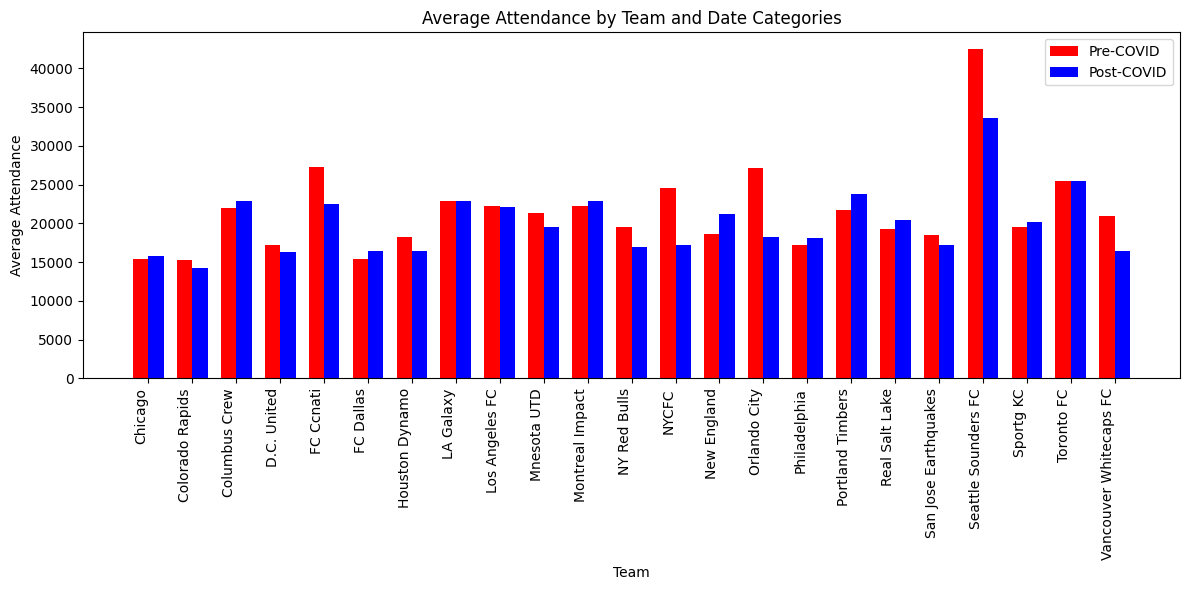

In [ ]:
pivot_df = covidteam.pivot(index='Team', columns='Date_Categories_', values='Attendance')


teams = pivot_df.index
categories = pivot_df.columns
x = np.arange(len(teams))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(x - width/2, pivot_df['Pre-COVID'], width, label='Pre-COVID', color='red')
ax.bar(x + width/2, pivot_df['Post-COVID'], width, label='Post-COVID', color='blue')


ax.set_xlabel('Team')
ax.set_ylabel('Average Attendance')
ax.set_title('Average Attendance by Team and Date Categories')
ax.set_xticks(x)
ax.set_xticklabels(teams, ha='right', rotation = 90)
ax.legend()

plt.tight_layout()
plt.show()

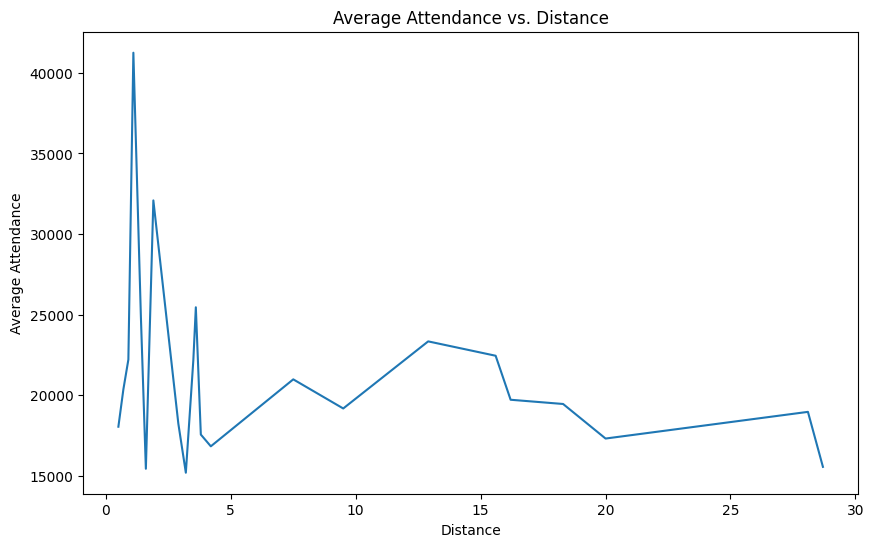

In [ ]:
distance_attendance = df.groupby('Distance')['Attendance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=distance_attendance, x='Distance', y='Attendance')
plt.title('Average Attendance vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Average Attendance')
plt.show()

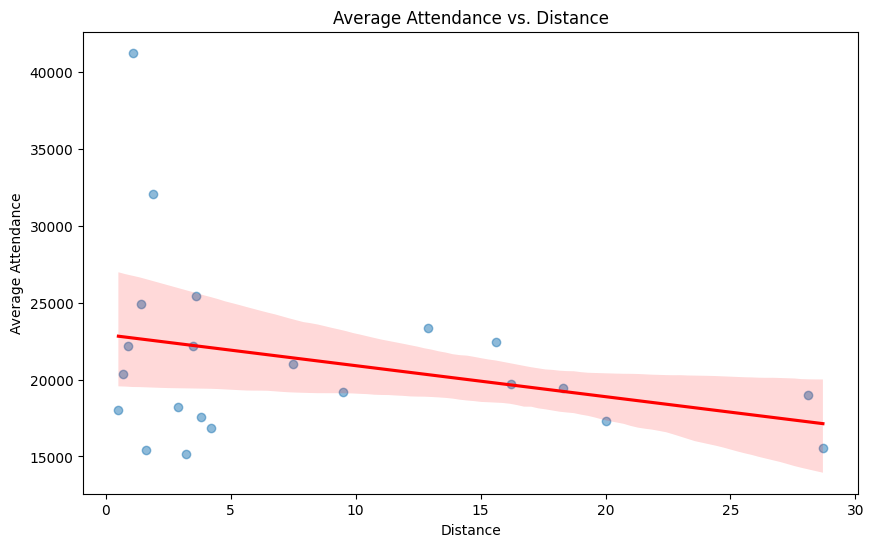

In [ ]:
distance_attendance = df.groupby('Distance')['Attendance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=distance_attendance, x='Distance', y='Attendance', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Average Attendance vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Average Attendance')
plt.show()

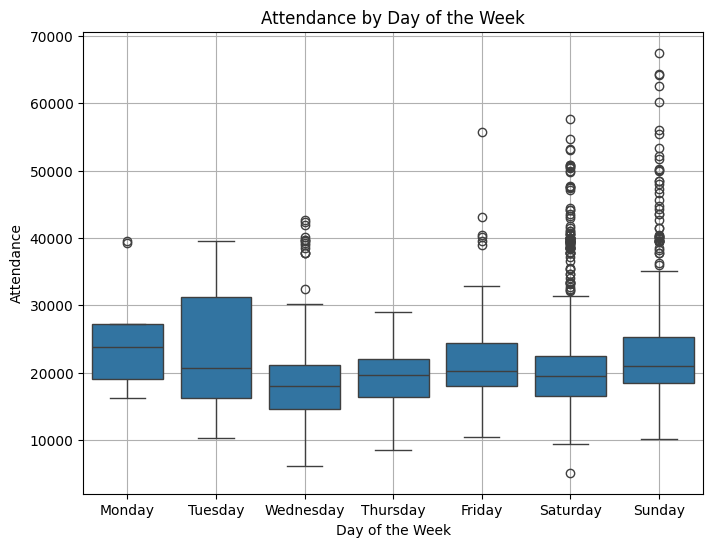

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Day_of_Week', y='Attendance')
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.grid(True)
#Relabel 0 - 7 with the Day of the Week
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), x_labels)
plt.show()

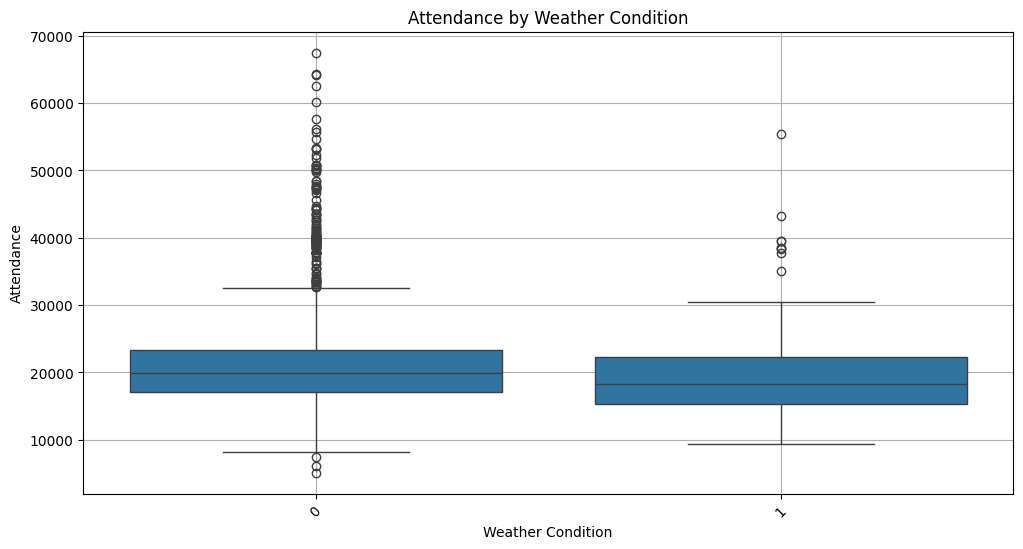

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition_value', y='Attendance')
plt.title('Attendance by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Attendance')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

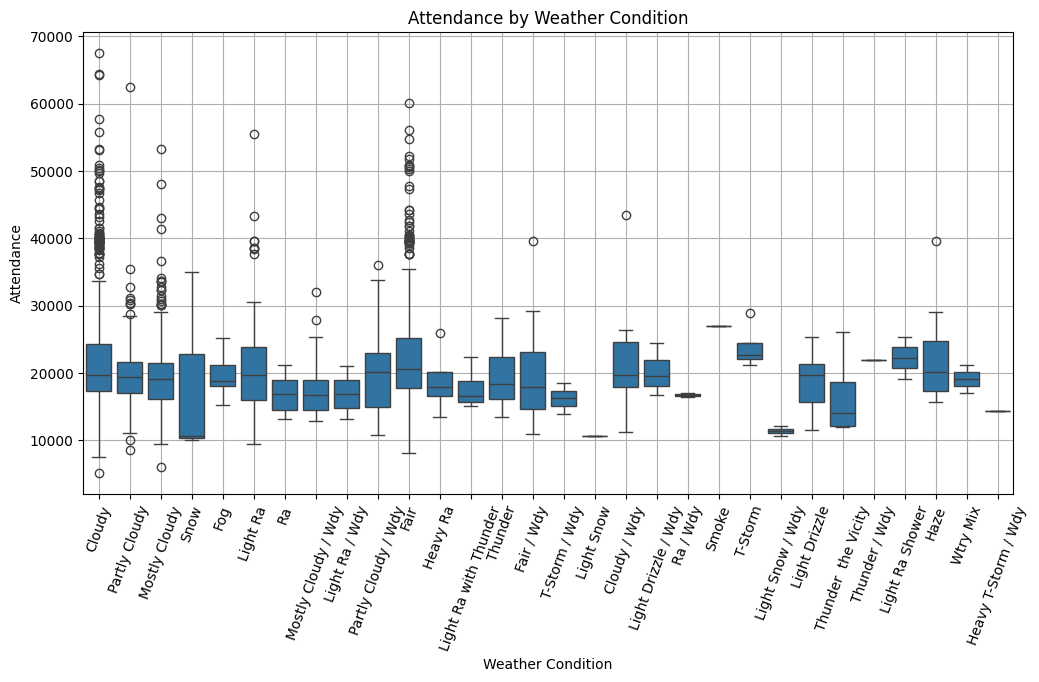

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Condition', y='Attendance')
plt.title('Attendance by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Attendance')
plt.grid(True)
plt.xticks(rotation=70)
plt.show()

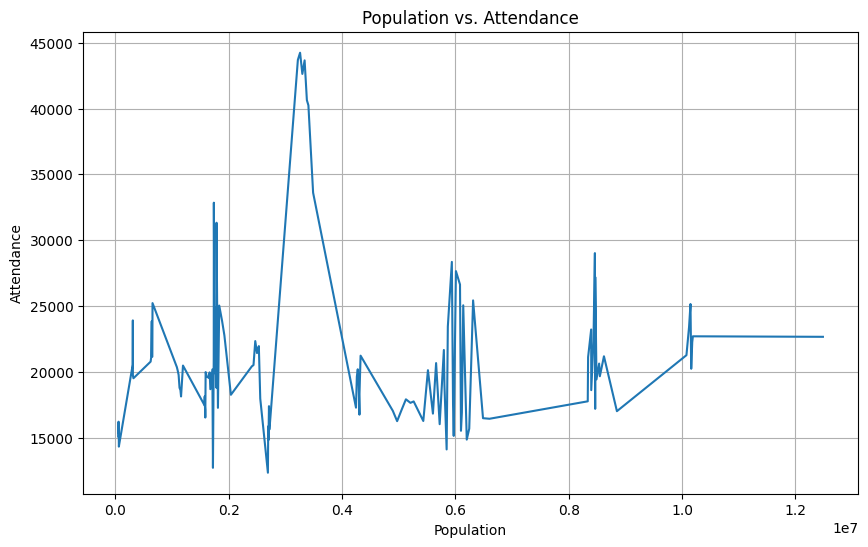

In [ ]:
population_attendance = df.groupby('Population')['Attendance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=population_attendance, x='Population', y='Attendance')
plt.title('Population vs. Attendance')
plt.xlabel('Population')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

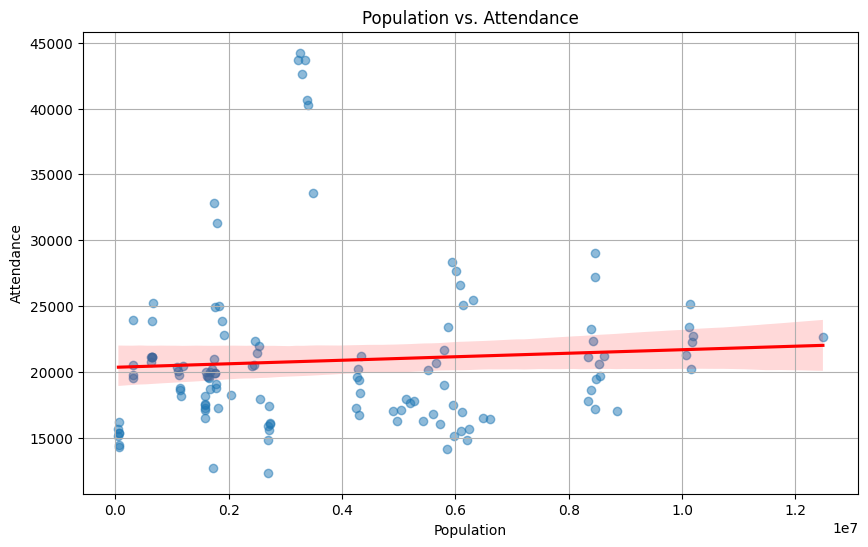

In [ ]:
population_attendance = df.groupby('Population')['Attendance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=population_attendance, x='Population', y='Attendance', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Population vs. Attendance')
plt.xlabel('Population')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()